In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns 

%matplotlib inline 

In [2]:
x = [1,2,3,4,5,6,7,8]
y = [1,2,3,4,6,7,9,10]
z = [1,2,3,4,6,7,9,10]

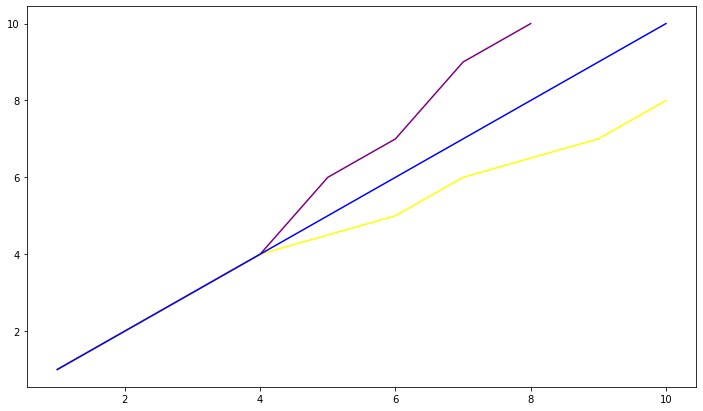

In [3]:
plt.figure(figsize=(12,7))

plt.plot(x,y, color='purple')
plt.plot(y,x, color='yellow')
plt.plot(z,y ,color='blue')

In [4]:
def porcentagem(x,y):
    #porcentagem
    resultado = (x * y) / 100
    #resultado
    return print(resultado)

In [5]:
porcentagem(200,50)

100.0


In [6]:
np.sqrt(200)

14.142135623730951

In [7]:
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [8]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
cat_cols = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
            'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

data.drop(cat_cols, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 25.8 K

In [11]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [12]:
# Linear Regression 
linear = LinearRegression(normalize=True)
linear.fit(X_train, y_train)
y_pred_linear = linear.predict(X_test)


# KNN Regressor 

knn = KNeighborsRegressor(n_neighbors=7, weights='distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


# l1 = Lasso 

lasso = Lasso(alpha=1.6, normalize=True, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


print('Linear Regression')
print('\n')

print('Linear Regression MSE: {}'.format(mean_squared_error(y_test, y_pred_linear)))
print('Linear Regression R-Squared: {}'.format(r2_score(y_test, y_pred_linear)))
print('\n','----'*10)
print('\n')

print('KNeighborsRegressor')
print('\n')
print('KNN MSE: {}'.format(mean_squared_error(y_test, y_pred_knn)))
print('KNN R-Squared: {}'.format(r2_score(y_test, y_pred_knn)))
print('\n','----'*10)
print('\n')


print('Lasso')
print('\n')
print('Lasso MSE: {}'.format(mean_squared_error(y_test, y_pred_lasso)))
print('Lasso R-Squared: {}'.format(r2_score(y_test, y_pred_lasso)))

Linear Regression


Linear Regression MSE: 11843650.222782087
Linear Regression R-Squared: 0.8290574230414718

 ----------------------------------------


KNeighborsRegressor


KNN MSE: 11248506.351100551
KNN R-Squared: 0.8376472939995505

 ----------------------------------------


Lasso


Lasso MSE: 12066476.884558525
Lasso R-Squared: 0.8258413061296551
